In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.head()

,uid,alg,params,recAlg,diversityEnhance,noveltyEnhance,r2Score,mae,map,aucScore,...,r10,nDCG10,nDCG100,nDCGFull,novelty5,novelty10,user_novelty5,user_novelty10,ild5,ild10
0,715904,attributeCosineSim,sameAllowed,temporal,no,no,-3.346125,0.399867,0.268264,0.898561,...,0.052632,0.149754,0.488658,0.603762,0.243555,0.274323,0.0,0.0,0.231029,0.280722
1,715904,attributeCosineSim,sameAllowed,temporal,yes,no,-3.346125,0.399867,0.266514,0.898561,...,0.052632,0.139253,0.484626,0.599730,0.253492,0.273193,0.0,0.0,0.290936,0.274213
2,715904,attributeCosineSim,sameAllowed,temporal,no,yes,-2.385189,0.344252,0.389553,0.921574,...,0.078947,0.275268,0.617884,0.682891,0.306567,0.305829,0.0,0.0,0.322857,0.317298
3,715904,attributeCosineSim,sameAllowed,temporal,yes,yes,-2.385189,0.344252,0.383851,0.921574,...,0.052632,0.247603,0.629472,0.694479,0.306567,0.304319,0.0,0.0,0.336896,0.337286
4,883157,attributeCosineSim,sameAllowed,temporal,no,no,-9.013746,0.407201,0.198070,0.936791,...,0.176471,0.265476,0.453511,0.536229,0.202006,0.206392,0.0,0.1,0.121897,0.187147


# Collecting clicks, mapping to the log file

In [3]:
from collections import defaultdict
lineList = list()
methods_dhondt = defaultdict(float)
methods_bandit = defaultdict(float)

with open("log.txt") as f:
    for line in f:
        ln = line.split(";")
        #print(ln)
        #print(ln[3])
        if ln[2].startswith("["):
            lineList.append(ln) 
logDF = pd.DataFrame(lineList)
logDF.columns = ["datetime","uid","kn_i","algorithm","rec_i"]
logDF.head()      
 

,datetime,uid,kn_i,algorithm,rec_i
0,2018-07-20 16:13:57.229698,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","5421,3394,6046,681,2333,705,6215,4225,4015,536..."
1,2018-07-20 16:14:35.923752,2709394,"[4105, 5988, 652]","('word2vec', '128_3', 'last', False, False)","652,5578,343,5357,1864,5615,3768,5047,563,5197..."
2,2018-07-20 16:15:08.182508,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","4232,4653,5998,3670,3688,2017,2009,3288,4228,4..."
3,2018-07-20 16:15:35.181778,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","105,5932,5368,5974,5876,6127,5234,5367,6255,12..."
4,2018-07-20 16:15:49.894229,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","4232,4653,5998,3670,3688,2017,2009,3288,4228,4..."


In [4]:
logDF.shape

(26597, 5)

In [5]:
logDF["known_oids"] = logDF["kn_i"].apply(eval)
logDF["rec_i"] = "["+logDF["rec_i"]+"]"
logDF["recommended_oids"] = logDF["rec_i"].apply(eval)
logDF.head() 

,datetime,uid,kn_i,algorithm,rec_i,known_oids,recommended_oids
0,2018-07-20 16:13:57.229698,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","[5421,3394,6046,681,2333,705,6215,4225,4015,53...","[5905, 4115]","[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."
1,2018-07-20 16:14:35.923752,2709394,"[4105, 5988, 652]","('word2vec', '128_3', 'last', False, False)","[652,5578,343,5357,1864,5615,3768,5047,563,519...","[4105, 5988, 652]","[652, 5578, 343, 5357, 1864, 5615, 3768, 5047,..."
2,2018-07-20 16:15:08.182508,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328..."
3,2018-07-20 16:15:35.181778,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[105,5932,5368,5974,5876,6127,5234,5367,6255,1...","[4105, 5988, 652, 4232]","[105, 5932, 5368, 5974, 5876, 6127, 5234, 5367..."
4,2018-07-20 16:15:49.894229,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328..."


In [6]:
#logDF.drop(["kn_i","rec_i"], axis=1, inplace=True)
#logDF.head() 

In [7]:
logDF["count_recs"] = logDF["recommended_oids"].apply(len)
logDF["count_known"] = logDF["known_oids"].apply(len)
logDF.head() 

,datetime,uid,kn_i,algorithm,rec_i,known_oids,recommended_oids,count_recs,count_known
0,2018-07-20 16:13:57.229698,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","[5421,3394,6046,681,2333,705,6215,4225,4015,53...","[5905, 4115]","[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",20,2
1,2018-07-20 16:14:35.923752,2709394,"[4105, 5988, 652]","('word2vec', '128_3', 'last', False, False)","[652,5578,343,5357,1864,5615,3768,5047,563,519...","[4105, 5988, 652]","[652, 5578, 343, 5357, 1864, 5615, 3768, 5047,...",20,3
2,2018-07-20 16:15:08.182508,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4
3,2018-07-20 16:15:35.181778,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[105,5932,5368,5974,5876,6127,5234,5367,6255,1...","[4105, 5988, 652, 4232]","[105, 5932, 5368, 5974, 5876, 6127, 5234, 5367...",20,4
4,2018-07-20 16:15:49.894229,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4


In [89]:
logDF[["count_known","count_recs"]].describe()

,count_known,count_recs
count,26597.000000,26597.000000
mean,14.187878,15.836448
std,18.577562,4.939240
min,1.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,20.000000
75%,22.000000,20.000000
max,50.000000,20.000000


In [90]:
logDF['uid'].nunique()

4238

In [91]:
logDF.shape

(26597, 20)

In [9]:
dfFeedback = pd.read_csv("onlineModels/results_CameraReady/AllData/validTestingResults.csv", sep=";", header=0, index_col=0)
dfFeedback.head()

,userID,objectID,visited_objects,eventType,eventValue,position,date
id,,,,,,,
38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
40,2673313,4788,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
41,2673313,6219,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
42,2673313,1687,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26


In [10]:
dfSelections = dfFeedback.loc[dfFeedback["eventType"] == "object_opened_from_list"]
dfSelections.head()


,userID,objectID,visited_objects,eventType,eventValue,position,date
id,,,,,,,
116,2709558,352,1,object_opened_from_list,1,recomended,2018-07-20 17:40:32
171,2709558,4330,2,object_opened_from_list,1,recomended,2018-07-20 17:45:13
184,2709558,4330,3,object_opened_from_list,1,recomended,2018-07-20 17:46:23
990,2533096,6024,3,object_opened_from_list,1,recomended,2018-07-20 19:44:38
1045,2709674,592,1,object_opened_from_list,1,recomended,2018-07-20 19:51:39


In [11]:
logDF["date"] = logDF["datetime"].str.split(".",1,True)[0]
logDF.head()

,datetime,uid,kn_i,algorithm,rec_i,known_oids,recommended_oids,count_recs,count_known,date
0,2018-07-20 16:13:57.229698,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","[5421,3394,6046,681,2333,705,6215,4225,4015,53...","[5905, 4115]","[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",20,2,2018-07-20 16:13:57
1,2018-07-20 16:14:35.923752,2709394,"[4105, 5988, 652]","('word2vec', '128_3', 'last', False, False)","[652,5578,343,5357,1864,5615,3768,5047,563,519...","[4105, 5988, 652]","[652, 5578, 343, 5357, 1864, 5615, 3768, 5047,...",20,3,2018-07-20 16:14:35
2,2018-07-20 16:15:08.182508,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4,2018-07-20 16:15:08
3,2018-07-20 16:15:35.181778,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[105,5932,5368,5974,5876,6127,5234,5367,6255,1...","[4105, 5988, 652, 4232]","[105, 5932, 5368, 5974, 5876, 6127, 5234, 5367...",20,4,2018-07-20 16:15:35
4,2018-07-20 16:15:49.894229,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4,2018-07-20 16:15:49


In [12]:
logDFR = logDF[["date","uid","algorithm","count_known","rec_i"]]

In [13]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
pairs = []
for k, row in dfSelections.iterrows():
    dfs = pysqldf("SELECT * FROM logDFR where logDFR.uid = '"+str(row["userID"])+"'and logDFR.date < '"+row["date"]+"' and logDFR.rec_i like '%"+str(row["objectID"])+"%' order by logDFR.date desc LIMIT 1;")
    if len(dfs) >0:
        pairs.append(dfs.iloc[0,:].append(row).values)

In [14]:
pairedFeedback = pd.DataFrame(pairs)
pairedFeedback.columns=["date","uid","alg","count_known","rec_i","uid_","clicked_oid","_already_visited","_event","_val","_pos","_date" ]

pairedFeedback.drop(["uid_","_already_visited","_event","_val","_pos","_date"], axis=1, inplace=True)
pairedFeedback.head()

,date,uid,alg,count_known,rec_i,clicked_oid
0,2018-07-20 17:37:39,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",1,"[352,3737,1228,358,563,343,6102,6105,4367,2962...",352
1,2018-07-20 17:44:41,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",2,"[5578,2083,1952,4330,5453,5583,5613,5452,5612,...",4330
2,2018-07-20 17:45:29,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",3,"[4330,5578,2083,1952,5613,5583,5453,5612,5452,...",4330
3,2018-07-20 19:42:57,2533096,"('doc2vec', '128_5', 'max', False, True)",2,"[2044,6024,160,4764,263,3312,2048,4686,445,681...",6024
4,2018-07-20 19:50:16,2709674,"('doc2vec', '32_5', 'mean', False, False)",1,"[592,6018,4991,6151,4645,295,6265,2200,4105,66...",592


In [15]:
pairedFeedback.shape

(830, 6)

In [16]:
pairedFeedback["recommended_oids"] = pairedFeedback["rec_i"].apply(eval)

(array([242., 143., 121., 110.,  81., 107.,   5.,   5.,   2.,   6.,   3.,
          3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <a list of 20 Patch objects>)

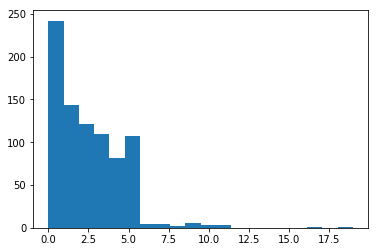

In [17]:
def locate(row): 
    try:
        return row.recommended_oids.index(row.clicked_oid)
    except:
        return -1
pairedFeedback["clicked_pos"] = pairedFeedback.apply(locate, axis=1)
plt.hist(pairedFeedback["clicked_pos"], bins=20)

In [18]:
pairedFeedback["clicked_pos_discount"] = 1 / np.log2(pairedFeedback.clicked_pos +2)
pairedFeedback["sum_pos_discount"] = np.sum([1 / np.log2(i+2) for i in range(20)])
pairedFeedback.head()

,date,uid,alg,count_known,rec_i,clicked_oid,recommended_oids,clicked_pos,clicked_pos_discount,sum_pos_discount
0,2018-07-20 17:37:39,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",1,"[352,3737,1228,358,563,343,6102,6105,4367,2962...",352,"[352, 3737, 1228, 358, 563, 343, 6102, 6105, 4...",0,1.000000,7.040268
1,2018-07-20 17:44:41,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",2,"[5578,2083,1952,4330,5453,5583,5613,5452,5612,...",4330,"[5578, 2083, 1952, 4330, 5453, 5583, 5613, 545...",3,0.430677,7.040268
2,2018-07-20 17:45:29,2709558,"('vsm', 'sameAllowed', 'mean', False, True)",3,"[4330,5578,2083,1952,5613,5583,5453,5612,5452,...",4330,"[4330, 5578, 2083, 1952, 5613, 5583, 5453, 561...",0,1.000000,7.040268
3,2018-07-20 19:42:57,2533096,"('doc2vec', '128_5', 'max', False, True)",2,"[2044,6024,160,4764,263,3312,2048,4686,445,681...",6024,"[2044, 6024, 160, 4764, 263, 3312, 2048, 4686,...",1,0.630930,7.040268
4,2018-07-20 19:50:16,2709674,"('doc2vec', '32_5', 'mean', False, False)",1,"[592,6018,4991,6151,4645,295,6265,2200,4105,66...",592,"[592, 6018, 4991, 6151, 4645, 295, 6265, 2200,...",0,1.000000,7.040268


# Collecting visits, mapping to the log file

In [19]:
dfFeedback = pd.read_csv("onlineModels/results_CameraReady/recent_implicit_feedback.csv", sep=";", header=0, index_col=None)
dfFeedback.head()

,id,userID,objectID,eventType,eventValue,lastModified
0,3706361,2705429,263,pageview,1,2018-07-16 00:04:42
1,3706364,2705430,5734,pageview,1,2018-07-16 00:07:05
2,3706366,2705431,324,pageview,1,2018-07-16 00:11:04
3,3706369,2705431,108,pageview,1,2018-07-16 00:11:48
4,3706372,2705433,303,pageview,1,2018-07-16 01:03:41


In [20]:
dfFeedback.dtypes

id               int64
userID           int64
objectID         int64
eventType       object
eventValue       int64
lastModified    object
dtype: object

In [21]:
logDFi = logDF.loc[:,["date","uid","algorithm","count_known","recommended_oids"]]
logDFi["ri"] = logDFi["recommended_oids"]
lst_col = 'recommended_oids'

logDFDeserialized = pd.DataFrame({
      col:np.repeat(logDFi[col].values, logDFi[lst_col].str.len())
      for col in logDFi.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(logDFi[lst_col].values)})[logDFi.columns]
logDFDeserialized.head()

,date,uid,algorithm,count_known,recommended_oids,ri
0,2018-07-20 16:13:57,2709442,"('word2vec', '128_3', 'last', False, False)",2,5421.0,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."
1,2018-07-20 16:13:57,2709442,"('word2vec', '128_3', 'last', False, False)",2,3394.0,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."
2,2018-07-20 16:13:57,2709442,"('word2vec', '128_3', 'last', False, False)",2,6046.0,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."
3,2018-07-20 16:13:57,2709442,"('word2vec', '128_3', 'last', False, False)",2,681.0,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."
4,2018-07-20 16:13:57,2709442,"('word2vec', '128_3', 'last', False, False)",2,2333.0,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,..."


In [22]:
logDFDeserialized.shape

(421202, 6)

In [23]:
logDFDeserialized["objectID"] = logDFDeserialized.recommended_oids.astype("int64")
logDFDeserialized["userID"] = logDFDeserialized["uid"].astype("int64")
logDFDeserialized.drop(["uid","recommended_oids"], axis = 1, inplace=True)
logDFDeserialized.head()

,date,algorithm,count_known,ri,objectID,userID
0,2018-07-20 16:13:57,"('word2vec', '128_3', 'last', False, False)",2,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",5421,2709442
1,2018-07-20 16:13:57,"('word2vec', '128_3', 'last', False, False)",2,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",3394,2709442
2,2018-07-20 16:13:57,"('word2vec', '128_3', 'last', False, False)",2,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",6046,2709442
3,2018-07-20 16:13:57,"('word2vec', '128_3', 'last', False, False)",2,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",681,2709442
4,2018-07-20 16:13:57,"('word2vec', '128_3', 'last', False, False)",2,"[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",2333,2709442


In [24]:
import datetime
merged = pd.merge(dfFeedback, logDFDeserialized, how='inner', on=("userID", "objectID"))
merged["dateX"] = pd.to_datetime(merged.date)
merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
merged.head()

,id,userID,objectID,eventType,eventValue,lastModified,date,algorithm,count_known,ri,dateX,lastModifiedX,dtDiff
0,3706438,2705485,324,pageview,1,2018-07-16 08:37:59,2018-08-07 10:22:35,"('doc2vec', '128_1', 'temporal', False, True)",3,"[49, 3391, 324, 5725, 5720, 5981, 5730, 5660, ...",2018-08-07 10:22:35,2018-07-16 08:37:59,80124
1,3706438,2705485,324,pageview,1,2018-07-16 08:37:59,2018-08-07 10:23:23,"('doc2vec', '128_1', 'temporal', False, True)",3,"[49, 3391, 324, 5720, 6127, 4708, 6256, 4938, ...",2018-08-07 10:23:23,2018-07-16 08:37:59,80076
2,3706438,2705485,324,pageview,1,2018-07-16 08:37:59,2018-08-07 10:23:50,"('doc2vec', '128_1', 'temporal', False, True)",3,"[324, 6242, 4224, 5371, 5974]",2018-08-07 10:23:50,2018-07-16 08:37:59,80049
3,3706438,2705485,324,pageview,1,2018-07-16 08:37:59,2018-08-10 15:19:12,"('doc2vec', '128_1', 'temporal', False, True)",3,"[49, 3391, 324, 5725, 5720, 5981, 5730, 5660, ...",2018-08-10 15:19:12,2018-07-16 08:37:59,62327
4,3706438,2705485,324,pageview,1,2018-07-16 08:37:59,2018-08-10 15:19:18,"('doc2vec', '128_1', 'temporal', False, True)",3,"[49, 3391, 324, 5720, 6127, 4708, 6256, 4938, ...",2018-08-10 15:19:18,2018-07-16 08:37:59,62321


In [25]:
mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5)  & (merged.eventType == "pageview")]
mergedRestr.head()

,id,userID,objectID,eventType,eventValue,lastModified,date,algorithm,count_known,ri,dateX,lastModifiedX,dtDiff
396,3635739,1529905,6155,pageview,9,2018-08-06 12:47:24,2018-07-26 15:30:46,"('doc2vec', '128_1', 'temporal', False, True)",50,"[4788, 3438, 386, 300, 6219, 3782, 1687, 6155,...",2018-07-26 15:30:46,2018-08-06 12:47:24,76598
397,3635739,1529905,6155,pageview,9,2018-08-06 12:47:24,2018-07-26 15:30:55,"('doc2vec', '128_1', 'temporal', False, True)",50,"[4788, 3438, 386, 300, 6219, 3782, 1687, 6155,...",2018-07-26 15:30:55,2018-08-06 12:47:24,76589
398,3635739,1529905,6155,pageview,9,2018-08-06 12:47:24,2018-07-26 15:31:02,"('doc2vec', '128_1', 'temporal', False, True)",50,"[4788, 4911, 3438, 6219, 386, 3782, 300, 1687,...",2018-07-26 15:31:02,2018-08-06 12:47:24,76582
399,3635739,1529905,6155,pageview,9,2018-08-06 12:47:24,2018-07-27 12:53:08,"('doc2vec', '128_1', 'temporal', False, True)",50,"[4788, 4911, 3438, 6219, 300, 386, 3782, 6155,...",2018-07-27 12:53:08,2018-08-06 12:47:24,86056
400,3635739,1529905,6155,pageview,9,2018-08-06 12:47:24,2018-07-27 12:53:36,"('doc2vec', '128_1', 'temporal', False, True)",50,"[4788, 4911, 3438, 6219, 300, 386, 3782, 6155,...",2018-07-27 12:53:36,2018-08-06 12:47:24,86028


In [26]:
mergedRestr.shape

(24720, 13)

In [27]:
mergedRestr.sort_values("dtDiff", inplace=True)
mergedRestr.drop_duplicates(["userID", "objectID", "lastModified"], inplace=True)
mergedRestr.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,userID,objectID,eventType,eventValue,lastModified,date,algorithm,count_known,ri,dateX,lastModifiedX,dtDiff
51099,3744983,2736522,5890,pageview,2,2018-08-15 08:10:46,2018-08-15 08:10:40,"('vsm', 'sameAllowed', 'mean', True, False)",1,"[5890, 5059, 2017, 5723, 6007, 6022, 6262, 471...",2018-08-15 08:10:40,2018-08-15 08:10:46,6
20381,3725636,2618790,157,pageview,3,2018-07-31 08:09:09,2018-07-31 08:09:03,"('vsm', 'sameAllowed', 'mean', True, False)",4,"[6061, 5986, 157, 4686, 160, 4658, 6042, 6049,...",2018-07-31 08:09:03,2018-07-31 08:09:09,6
44869,3742197,2082695,90,pageview,1,2018-08-13 10:18:31,2018-08-13 10:18:25,"('word2vec', '32_3', 'window10', False, False)",50,"[80, 5932, 6242, 105, 3840, 6127, 5367, 90, 56...",2018-08-13 10:18:25,2018-08-13 10:18:31,6
9812,3717387,1136026,4788,pageview,1,2018-07-24 11:46:22,2018-07-24 11:46:16,"('word2vec', '128_3', 'last', False, False)",50,"[6155, 6219, 3438, 6191, 6224, 5600, 6096, 387...",2018-07-24 11:46:16,2018-07-24 11:46:22,6
42245,3740510,2731635,6219,pageview,1,2018-08-11 20:59:45,2018-08-11 20:59:39,"('doc2vec', '32_5', 'mean', False, True)",2,"[5600, 302, 3782, 300, 3438, 725, 385, 3787, 3...",2018-08-11 20:59:39,2018-08-11 20:59:45,6


In [28]:
mergedRestr.shape

(2824, 13)

In [29]:
mergedRestr.drop(["id","eventType","eventValue","lastModified","dateX","lastModifiedX" ], axis=1, inplace=True)
mergedRestr.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,userID,objectID,date,algorithm,count_known,ri,dtDiff
51099,2736522,5890,2018-08-15 08:10:40,"('vsm', 'sameAllowed', 'mean', True, False)",1,"[5890, 5059, 2017, 5723, 6007, 6022, 6262, 471...",6
20381,2618790,157,2018-07-31 08:09:03,"('vsm', 'sameAllowed', 'mean', True, False)",4,"[6061, 5986, 157, 4686, 160, 4658, 6042, 6049,...",6
44869,2082695,90,2018-08-13 10:18:25,"('word2vec', '32_3', 'window10', False, False)",50,"[80, 5932, 6242, 105, 3840, 6127, 5367, 90, 56...",6
9812,1136026,4788,2018-07-24 11:46:16,"('word2vec', '128_3', 'last', False, False)",50,"[6155, 6219, 3438, 6191, 6224, 5600, 6096, 387...",6
42245,2731635,6219,2018-08-11 20:59:39,"('doc2vec', '32_5', 'mean', False, True)",2,"[5600, 302, 3782, 300, 3438, 725, 385, 3787, 3...",6


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([1376.,  432.,  345.,  174.,  168.,   81.,   61.,   59.,   76.,
          52.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

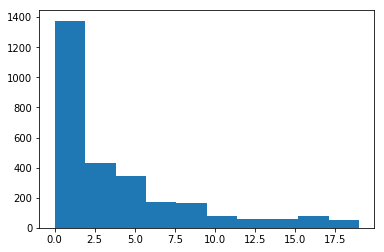

In [30]:
def locate(row): 
    try:
        return row.recommended_oids.index(row.objectID)
    except:
        return -1

mergedRestr.rename(columns={"ri": "recommended_oids"}, inplace=True)
mergedRestr["visited_pos"] = mergedRestr.apply(locate, axis=1)
plt.hist(mergedRestr["visited_pos"])

In [31]:
pairedFeedbackVisits = mergedRestr

In [32]:
pairedFeedbackVisits.shape

(2824, 8)

In [33]:
pairedFeedbackVisits["visited_pos_discount"] = 1 / np.log2(pairedFeedbackVisits.visited_pos +2)
pairedFeedbackVisits["sum_pos_discount"] = np.sum([1 / np.log2(i+2) for i in range(20)])
pairedFeedbackVisits.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,userID,objectID,date,algorithm,count_known,recommended_oids,dtDiff,visited_pos,visited_pos_discount,sum_pos_discount
51099,2736522,5890,2018-08-15 08:10:40,"('vsm', 'sameAllowed', 'mean', True, False)",1,"[5890, 5059, 2017, 5723, 6007, 6022, 6262, 471...",6,0,1.000000,7.040268
20381,2618790,157,2018-07-31 08:09:03,"('vsm', 'sameAllowed', 'mean', True, False)",4,"[6061, 5986, 157, 4686, 160, 4658, 6042, 6049,...",6,2,0.500000,7.040268
44869,2082695,90,2018-08-13 10:18:25,"('word2vec', '32_3', 'window10', False, False)",50,"[80, 5932, 6242, 105, 3840, 6127, 5367, 90, 56...",6,7,0.315465,7.040268
9812,1136026,4788,2018-07-24 11:46:16,"('word2vec', '128_3', 'last', False, False)",50,"[6155, 6219, 3438, 6191, 6224, 5600, 6096, 387...",6,13,0.255958,7.040268
42245,2731635,6219,2018-08-11 20:59:39,"('doc2vec', '32_5', 'mean', False, True)",2,"[5600, 302, 3782, 300, 3438, 725, 385, 3787, 3...",6,14,0.250000,7.040268


# Calculate CTR and VRR metrics

In [34]:
def q75(x):
    return x.quantile(0.75)
def q80(x):
    return x.quantile(0.80)
def q85(x):
    return x.quantile(0.85)
def q90(x):
    return x.quantile(0.90)
def q95(x):
    return x.quantile(0.95)


In [35]:
#several hacks that allows not to evaluate every single pair of objects for logDF
pairedFeedback["clicks"] = 1
pairedFeedback["clicks_weighted"] = 1 / pairedFeedback["count_known"] 
pairedFeedback["clicked_pos_discount_weighted"] = pairedFeedback["clicked_pos_discount"] /pairedFeedback["count_known"] 
pairedFeedback["weight"] = 1 / pairedFeedback["count_known"]

pairedFeedback["lukas_impl_pos"] = pairedFeedback["clicks"]
pairedFeedback["lukas_impl_neg"] = - 1 + pairedFeedback["clicked_pos_discount"]
pairedFeedback["godel_impl_pos"] = pairedFeedback["clicks"]


pairedFeedbackVisits["visits"] = 1
pairedFeedbackVisits["visits_weighted"] = 1 / pairedFeedbackVisits["count_known"] 
pairedFeedbackVisits["visited_pos_discount_weighted"] = pairedFeedbackVisits["visited_pos_discount"] /pairedFeedbackVisits["count_known"] 
pairedFeedbackVisits["weight"] = 1 / pairedFeedbackVisits["count_known"] 

pairedFeedbackVisits["lukas_impl_pos_v"] = pairedFeedbackVisits["visits"]
pairedFeedbackVisits["lukas_impl_neg_v"] = - 1 + pairedFeedbackVisits["visited_pos_discount"]
pairedFeedbackVisits["godel_impl_pos_v"] = pairedFeedbackVisits["visits"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [37]:
logDF["rec_list_len"] = logDF.recommended_oids.apply(len)


In [36]:
logDF["lukas_impl_neg_v"] = np.sum([1-(1 / np.log2(i+2)) for i in range(20)])
#adjustments for the most common size of the recommended list
logDF["lukas_impl_neg"] = np.sum([1-(1 / np.log2(i+2)) for i in range(6)])

logDF["lukas_impl_pos_v"] = 0
logDF["lukas_impl_pos"] = 0

logDF["godel_impl_neg_v"] = 0
logDF["godel_impl_neg"] = 0

logDF["godel_impl_pos_v"] = 0
logDF["godel_impl_pos"] = 0



logDF["weight"] = 1 / logDF["count_known"] 
logDF["sum"] = 1
logDF.head(50)

,datetime,uid,kn_i,algorithm,rec_i,known_oids,recommended_oids,count_recs,count_known,date,lukas_impl_neg_v,lukas_impl_neg,lukas_impl_pos_v,lukas_impl_pos,godel_impl_neg_v,godel_impl_neg,godel_impl_pos_v,godel_impl_pos,weight,sum
0,2018-07-20 16:13:57.229698,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","[5421,3394,6046,681,2333,705,6215,4225,4015,53...","[5905, 4115]","[5421, 3394, 6046, 681, 2333, 705, 6215, 4225,...",20,2,2018-07-20 16:13:57,12.959732,2.695334,0,0,0,0,0,0,0.500000,1
1,2018-07-20 16:14:35.923752,2709394,"[4105, 5988, 652]","('word2vec', '128_3', 'last', False, False)","[652,5578,343,5357,1864,5615,3768,5047,563,519...","[4105, 5988, 652]","[652, 5578, 343, 5357, 1864, 5615, 3768, 5047,...",20,3,2018-07-20 16:14:35,12.959732,2.695334,0,0,0,0,0,0,0.333333,1
2,2018-07-20 16:15:08.182508,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4,2018-07-20 16:15:08,12.959732,2.695334,0,0,0,0,0,0,0.250000,1
3,2018-07-20 16:15:35.181778,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[105,5932,5368,5974,5876,6127,5234,5367,6255,1...","[4105, 5988, 652, 4232]","[105, 5932, 5368, 5974, 5876, 6127, 5234, 5367...",20,4,2018-07-20 16:15:35,12.959732,2.695334,0,0,0,0,0,0,0.250000,1
4,2018-07-20 16:15:49.894229,2709394,"[4105, 5988, 652, 4232]","('word2vec', '128_3', 'last', False, False)","[4232,4653,5998,3670,3688,2017,2009,3288,4228,...","[4105, 5988, 652, 4232]","[4232, 4653, 5998, 3670, 3688, 2017, 2009, 328...",20,4,2018-07-20 16:15:49,12.959732,2.695334,0,0,0,0,0,0,0.250000,1
5,2018-07-20 16:20:31.681766,2709442,"[5905, 4115]","('word2vec', '128_3', 'last', False, False)","[4115,1976,2698,4622,5271,5305,1625,4744,5723,...","[5905, 4115]","[4115, 1976, 2698, 4622, 5271, 5305, 1625, 474...",20,2,2018-07-20 16:20:31,12.959732,2.695334,0,0,0,0,0,0,0.500000,1
6,2018-07-20 16:22:18.837390,2709500,[6231],"('word2vec', '64_5', 'mean', True, False)","[6231,6234,1220,6227,6105,6229,6180,6170,3707,...",[6231],"[6231, 6234, 1220, 6227, 6105, 6229, 6180, 617...",10,1,2018-07-20 16:22:18,12.959732,2.695334,0,0,0,0,0,0,1.000000,1
7,2018-07-20 16:22:27.934476,2709500,[6231],"('word2vec', '64_5', 'mean', True, False)","[6231,6234,1220,6227,6105,6229,6180,6170,6245,...",[6231],"[6231, 6234, 1220, 6227, 6105, 6229, 6180, 617...",10,1,2018-07-20 16:22:27,12.959732,2.695334,0,0,0,0,0,0,1.000000,1
8,2018-07-20 16:26:37.500248,2709394,"[4105, 5988, 652, 4232, 5238]","('word2vec', '128_3', 'last', False, False)","[5238,871,5266,28,2915,6115,3966,6151,80,3391,...","[4105, 5988, 652, 4232, 5238]","[5238, 871, 5266, 28, 2915, 6115, 3966, 6151, ...",20,5,2018-07-20 16:26:37,12.959732,2.695334,0,0,0,0,0,0,0.200000,1
9,2018-07-20 16:29:26.815330,2709394,"[4105, 5988, 652, 4232, 5238]","('word2vec', '128_3', 'last', False, False)","[5238,871,5266,28,2915,6115,3966,6151,80,3391,...","[4105, 5988, 652, 4232, 5238]","[5238, 871, 5266, 28, 2915, 6115, 3966, 6151, ...",20,5,2018-07-20 16:29:26,12.959732,2.695334,0,0,0,0,0,0,0.200000,1


In [39]:
#grouping is performed for the individual recommendation sessions (identified by UID and date)
groupedFeedback = pairedFeedback[["uid", "alg","date","weight","clicked_pos_discount","lukas_impl_pos","lukas_impl_neg","godel_impl_pos"]].groupby(["uid", "alg", "date"])
ctCount = groupedFeedback.agg("sum")
ctCount.head()

weight  \
uid     alg                                            date                            
1241770 ('word2vec', '128_3', 'last', False, False)    2018-08-06 12:19:52  0.333333   
                                                       2018-08-06 12:22:50  0.750000   
1284215 ('word2vec', '32_3', 'window10', False, False) 2018-07-30 15:10:10  0.037037   
                                                       2018-07-30 15:42:02  0.037037   
                                                       2018-07-30 15:44:16  0.037037   

                                                                            clicked_pos_discount  \
uid     alg                                            date                                        
1241770 ('word2vec', '128_3', 'last', False, False)    2018-08-06 12:19:52              0.500000   
                                                       2018-08-06 12:22:50              1.892789   
1284215 ('word2vec', '32_3', 'window10', False, False) 2018-07-30 15:10:10              0.356207   
                                                       2018-07-30 15:42:02              1.000000   
                                                       2018-07-30 15:44:16              0.386853   

                                                                            lukas_impl_pos  \
uid     alg                                            date                                  
1241770 ('word2vec', '128_3', 'last', False, False)    2018-08-06 12:19:52               1   
                                                       2018-08-06 12:22:50               3   
1284215 ('word2vec', '32_3', 'window10', False, False) 2018-07-30 15:10:10               1   
                                                       2018-07-30 15:42:02               1   
                                                       2018-07-30 15:44:16               1   

                                                                            lukas_impl_neg  \
uid     alg                                            date                                  
1241770 ('word2vec', '128_3', 'last', False, False)    2018-08-06 12:19:52       -0.500000   
                                                       2018-08-06 12:22:50       -1.107211   
1284215 ('word2vec', '32_3', 'window10', False, False) 2018-07-30 15:10:10       -0.643793   
                                                       2018-07-30 15:42:02        0.000000   
                                                       2018-07-30 15:44:16       -0.613147   

                                                                            godel_impl_pos  
uid     alg                                            date                                 
1241770 ('word2vec', '128_3', 'last', False, False)    2018-08-06 12:19:52               1  
                                                       2018-08-06 12:22:50               3  
1284215 ('word2vec', '32_3', 'window10', False, False) 2018-07-30 15:10:10               1  
                                                       2018-07-30 15:42:02               1  
                                                       2018-07-30 15:44:16               1

In [40]:
ctCount.shape

(783, 5)

In [44]:
pairedFeedbackVisits.rename(columns={"userID": "uid", "algorithm": "alg"}, inplace=True)
pairedFeedbackVisits.uid = pairedFeedbackVisits.uid.astype(str)
groupedFeedback = pairedFeedbackVisits[["uid", "alg","date","weight","visited_pos_discount","lukas_impl_pos_v","lukas_impl_neg_v","godel_impl_pos_v"]].groupby(["uid", "alg", "date"])
vrCount = groupedFeedback.agg("sum")
vrCount.head()

weight  \
uid     alg                                              date                            
1050097 ('doc2vec', '128_1', 'temporal', False, True)    2018-07-28 20:06:55  0.031250   
                                                         2018-07-31 21:20:44  0.030303   
                                                         2018-08-15 11:09:02  0.030303   
1120939 ('vsm', 'sameAllowed', 'window10', False, False) 2018-07-26 08:05:21  0.020000   
1136026 ('word2vec', '128_3', 'last', False, False)      2018-07-24 11:45:16  0.020000   

                                                                              visited_pos_discount  \
uid     alg                                              date                                        
1050097 ('doc2vec', '128_1', 'temporal', False, True)    2018-07-28 20:06:55              0.244651   
                                                         2018-07-31 21:20:44              1.000000   
                                                         2018-08-15 11:09:02              0.430677   
1120939 ('vsm', 'sameAllowed', 'window10', False, False) 2018-07-26 08:05:21              0.315465   
1136026 ('word2vec', '128_3', 'last', False, False)      2018-07-24 11:45:16              0.430677   

                                                                              lukas_impl_pos_v  \
uid     alg                                              date                                    
1050097 ('doc2vec', '128_1', 'temporal', False, True)    2018-07-28 20:06:55                 1   
                                                         2018-07-31 21:20:44                 1   
                                                         2018-08-15 11:09:02                 1   
1120939 ('vsm', 'sameAllowed', 'window10', False, False) 2018-07-26 08:05:21                 1   
1136026 ('word2vec', '128_3', 'last', False, False)      2018-07-24 11:45:16                 1   

                                                                              lukas_impl_neg_v  \
uid     alg                                              date                                    
1050097 ('doc2vec', '128_1', 'temporal', False, True)    2018-07-28 20:06:55         -0.755349   
                                                         2018-07-31 21:20:44          0.000000   
                                                         2018-08-15 11:09:02         -0.569323   
1120939 ('vsm', 'sameAllowed', 'window10', False, False) 2018-07-26 08:05:21         -0.684535   
1136026 ('word2vec', '128_3', 'last', False, False)      2018-07-24 11:45:16         -0.569323   

                                                                              godel_impl_pos_v  
uid     alg                                              date                                   
1050097 ('doc2vec', '128_1', 'temporal', False, True)    2018-07-28 20:06:55                 1  
                                                         2018-07-31 21:20:44                 1  
                                                         2018-08-15 11:09:02                 1  
1120939 ('vsm', 'sameAllowed', 'window10', False, False) 2018-07-26 08:05:21                 1  
1136026 ('word2vec', '128_3', 'last', False, False)      2018-07-24 11:45:16                 1

In [45]:
vrCount.shape

(2771, 5)

In [46]:
logDF.shape

(26597, 20)

In [47]:
logDF.rename(columns={"algorithm": "alg"}, inplace=True)
groupedRecs = logDF[["uid", "alg","date", "weight", "sum","count_recs", "godel_impl_pos", "godel_impl_pos_v", "godel_impl_neg", "godel_impl_neg_v", "lukas_impl_pos", "lukas_impl_pos_v", "lukas_impl_neg", "lukas_impl_neg_v"]].groupby(["uid", "alg","date"])
recsCount = groupedRecs.agg("first")
recsCount.shape

(26531, 11)

In [53]:

recsCount["lukas_impl_pos"] = ctCount["lukas_impl_pos"]
recsCount["lukas_impl_neg"] =  ctCount["lukas_impl_neg"]
recsCount["godel_impl_pos"] = ctCount["godel_impl_pos"]

recsCount["lukas_impl_pos_v"] = vrCount["lukas_impl_pos_v"]
recsCount["lukas_impl_neg_v"] = vrCount["lukas_impl_neg_v"]
recsCount["godel_impl_pos_v"] = vrCount["godel_impl_pos_v"]

recsCount["ctr"] = ctCount["godel_impl_pos"] / 6
recsCount["vrr"] = vrCount["godel_impl_pos_v"] / 20

recsCount["ctr_weighted"] = ctCount["godel_impl_pos"]*ctCount.weight / 6
recsCount["vrr_weighted"] = vrCount["godel_impl_pos_v"]*vrCount.weight / 20

recsCount["ctr_pos_discounted"] = ctCount.clicked_pos_discount / np.sum([(1 / np.log2(i+2)) for i in range(6)])
recsCount["vrr_pos_discounted"] = vrCount.visited_pos_discount / recsCount["count_recs"].apply(lambda x: np.sum([(1 / np.log2(i+2)) for i in range(x)]))

recsCount.fillna(0, inplace=True)

recsCount["lukas_impl_neg"]  = recsCount["lukas_impl_neg"] + np.sum([(1 / np.log2(i+2)) for i in range(6)])
recsCount["lukas_impl_neg_v"] = recsCount["lukas_impl_neg_v"] + np.sum([(1 / np.log2(i+2)) for i in range(20)])

#mean value for implications
recsCount["lukas_impl"] = (recsCount["lukas_impl_pos"] + recsCount["lukas_impl_neg"]) / 6
recsCount["godel_impl"] = (recsCount["godel_impl_pos"] + recsCount["godel_impl_neg"]) / 6

recsCount["lukas_impl_v"] = (recsCount["lukas_impl_pos_v"] + recsCount["lukas_impl_neg_v"]) / 20
recsCount["godel_impl_v"] = (recsCount["godel_impl_pos_v"] + recsCount["godel_impl_neg_v"]) / 20



In [54]:
recsCount[["lukas_impl_pos","lukas_impl_neg","lukas_impl_pos_v","lukas_impl_neg_v","lukas_impl","lukas_impl_v","godel_impl"]].max()

lukas_impl_pos      4.000000
lukas_impl_neg      3.304666
lukas_impl_pos_v    6.000000
lukas_impl_neg_v    7.040268
lukas_impl          0.884111
lukas_impl_v        0.462752
godel_impl          0.666667
dtype: float64

In [55]:
recsCount["uids"] = recsCount.index.get_level_values("uid").values
recsCount["uids"] = recsCount["uids"].astype("int64")

In [56]:
recsCount["rec_variant"] = recsCount["uids"] % 12

In [59]:
recsCount[["vrr_weighted","weight","godel_impl_v"]].head()

vrr_weighted  \
uid     alg                                           date                                
1050097 ('doc2vec', '128_1', 'temporal', False, True) 2018-07-27 17:03:32           0.0   
                                                      2018-07-27 17:03:41           0.0   
                                                      2018-07-27 17:04:58           0.0   
                                                      2018-07-28 20:04:51           0.0   
                                                      2018-07-28 20:05:06           0.0   

                                                                             weight  \
uid     alg                                           date                            
1050097 ('doc2vec', '128_1', 'temporal', False, True) 2018-07-27 17:03:32  0.032258   
                                                      2018-07-27 17:03:41  0.032258   
                                                      2018-07-27 17:04:58  0.032258   
                                                      2018-07-28 20:04:51  0.032258   
                                                      2018-07-28 20:05:06  0.032258   

                                                                           godel_impl_v  
uid     alg                                           date                               
1050097 ('doc2vec', '128_1', 'temporal', False, True) 2018-07-27 17:03:32           0.0  
                                                      2018-07-27 17:03:41           0.0  
                                                      2018-07-27 17:04:58           0.0  
                                                      2018-07-28 20:04:51           0.0  
                                                      2018-07-28 20:05:06           0.0

In [62]:
recsCountRestr = recsCount[["weight","rec_variant","lukas_impl","godel_impl","ctr_weighted","ctr_pos_discounted","lukas_impl_v","godel_impl_v","vrr_weighted","vrr_pos_discounted"]]
resultsGroupByRV = recsCountRestr.groupby(by=["rec_variant"])
resultsGroupByRV_mean = resultsGroupByRV.agg("mean")
resultsGroupByRV_mean.ctr_weighted = resultsGroupByRV_mean.ctr_weighted/resultsGroupByRV_mean.weight
resultsGroupByRV_mean.vrr_weighted = resultsGroupByRV_mean.vrr_weighted/resultsGroupByRV_mean.weight
resultsGroupByRV_mean.drop("weight", axis=1, inplace=True)

In [63]:
resultsGroupByRV_mean

,lukas_impl,godel_impl,ctr_weighted,ctr_pos_discounted,lukas_impl_v,godel_impl_v,vrr_weighted,vrr_pos_discounted
rec_variant,,,,,,,,
0,0.553064,0.003853,0.007360,0.004151,0.355390,0.005201,0.005441,0.014247
1,0.553391,0.004081,0.007359,0.004745,0.355260,0.005163,0.006912,0.010193
2,0.555999,0.007414,0.008692,0.009479,0.356028,0.005702,0.006158,0.011618
3,0.553553,0.004170,0.004959,0.005038,0.354832,0.004278,0.005403,0.008956
4,0.554672,0.005810,0.007009,0.007071,0.355801,0.005515,0.005951,0.016277
5,0.552547,0.003237,0.004028,0.003213,0.353657,0.003384,0.003420,0.006933
6,0.554030,0.005537,0.011123,0.005904,0.355099,0.005098,0.007482,0.012541
7,0.555467,0.007719,0.010635,0.008513,0.355507,0.006003,0.005997,0.009996
8,0.553745,0.005265,0.006624,0.005388,0.355504,0.005581,0.007455,0.010721


In [92]:
resultsGroupByRV_mean[['godel_impl', 'ctr_pos_discounted', 'ctr_weighted', 'lukas_impl', 'godel_impl_v', 'vrr_pos_discounted', 'vrr_weighted', 'lukas_impl_v']]

,godel_impl,ctr_pos_discounted,ctr_weighted,lukas_impl,godel_impl_v,vrr_pos_discounted,vrr_weighted,lukas_impl_v
rec_variant,,,,,,,,
0,0.003853,0.004151,0.007360,0.553064,0.005201,0.014247,0.005441,0.355390
1,0.004081,0.004745,0.007359,0.553391,0.005163,0.010193,0.006912,0.355260
2,0.007414,0.009479,0.008692,0.555999,0.005702,0.011618,0.006158,0.356028
3,0.004170,0.005038,0.004959,0.553553,0.004278,0.008956,0.005403,0.354832
4,0.005810,0.007071,0.007009,0.554672,0.005515,0.016277,0.005951,0.355801
5,0.003237,0.003213,0.004028,0.552547,0.003384,0.006933,0.003420,0.353657
6,0.005537,0.005904,0.011123,0.554030,0.005098,0.012541,0.007482,0.355099
7,0.007719,0.008513,0.010635,0.555467,0.006003,0.009996,0.005997,0.355507
8,0.005265,0.005388,0.006624,0.553745,0.005581,0.010721,0.007455,0.355504


In [64]:
resultsGroupByRV_mean.to_csv("results_PV_level1.csv", sep=";", header=True, index=True)

In [99]:
resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_pos_discounted

rec_variant
0     0.928161
1     0.860097
2     0.782157
3     0.827686
4     0.821708
5     1.007594
6     0.937899
7     0.906671
8     0.977256
9     0.834170
10    0.952225
11    0.860478
dtype: float64

In [107]:
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_pos_discounted)[0:5].mean())
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_pos_discounted)[5:8].mean())
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_pos_discounted)[8:].mean())

0.8439620323184215
0.950721335844153
0.906032342297878


In [106]:
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_pos_discounted)[0:5].mean())
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_pos_discounted)[5:8].mean())
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_pos_discounted)[8:].mean())

0.43576841626469776
0.49842052693778
0.5028500311961432


In [108]:
resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_weighted

rec_variant
0     0.523475
1     0.554563
2     0.853007
3     0.840892
4     0.828962
5     0.803773
6     0.497834
7     0.725805
8     0.794837
9     0.674920
10    1.001235
11    0.714743
dtype: float64

In [109]:
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_weighted)[0:5].mean())
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_weighted)[5:8].mean())
print((resultsGroupByRV_mean.godel_impl / resultsGroupByRV_mean.ctr_weighted)[8:].mean())

0.7201797055949968
0.675803684022593
0.7964334421309578


In [110]:
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_weighted)[0:5].mean())
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_weighted)[5:8].mean())
print((resultsGroupByRV_mean.godel_impl_v / resultsGroupByRV_mean.vrr_weighted)[8:].mean())

0.8694841961797997
0.8906636008465362
0.9067756264324951


In [112]:
lst = []
from scipy.stats import kendalltau
for i in resultsGroupByRV_mean.columns:
    for j in resultsGroupByRV_mean.columns:
        if i != j:
            print(i,j,kendalltau(resultsGroupByRV_mean[i], resultsGroupByRV_mean[j])[0])
            lst.append(kendalltau(resultsGroupByRV_mean[i], resultsGroupByRV_mean[j])[0])
print(np.mean(lst))
print(np.median(lst))

lukas_impl godel_impl 0.8787878787878787
lukas_impl ctr_weighted 0.3636363636363636
lukas_impl ctr_pos_discounted 0.9999999999999998
lukas_impl lukas_impl_v 0.5151515151515151
lukas_impl godel_impl_v 0.4848484848484848
lukas_impl vrr_weighted 0.2121212121212121
lukas_impl vrr_pos_discounted 0.2727272727272727
godel_impl lukas_impl 0.8787878787878787
godel_impl ctr_weighted 0.3636363636363636
godel_impl ctr_pos_discounted 0.8787878787878787
godel_impl lukas_impl_v 0.5151515151515151
godel_impl godel_impl_v 0.4848484848484848
godel_impl vrr_weighted 0.2121212121212121
godel_impl vrr_pos_discounted 0.3333333333333333
ctr_weighted lukas_impl 0.3636363636363636
ctr_weighted godel_impl 0.3636363636363636
ctr_weighted ctr_pos_discounted 0.3636363636363636
ctr_weighted lukas_impl_v 0.1818181818181818
ctr_weighted godel_impl_v 0.2121212121212121
ctr_weighted vrr_weighted 0.4242424242424242
ctr_weighted vrr_pos_discounted 0.3636363636363636
ctr_pos_discounted lukas_impl 0.9999999999999998
ctr_po

In [113]:
lst = []
print(kendalltau(resultsGroupByRV_mean["godel_impl"], resultsGroupByRV_mean["godel_impl_v"])[0])
print(kendalltau(resultsGroupByRV_mean["ctr_pos_discounted"], resultsGroupByRV_mean["vrr_pos_discounted"])[0])
print(kendalltau(resultsGroupByRV_mean["ctr_weighted"], resultsGroupByRV_mean["vrr_weighted"])[0])
print(kendalltau(resultsGroupByRV_mean["lukas_impl"], resultsGroupByRV_mean["lukas_impl_v"])[0])


0.4848484848484848
0.2727272727272727
0.4242424242424242
0.5151515151515151


In [116]:
resultsGroupByRV_mean

,lukas_impl,godel_impl,ctr_weighted,ctr_pos_discounted,lukas_impl_v,godel_impl_v,vrr_weighted,vrr_pos_discounted
rec_variant,,,,,,,,
0,0.553064,0.003853,0.007360,0.004151,0.355390,0.005201,0.005441,0.014247
1,0.553391,0.004081,0.007359,0.004745,0.355260,0.005163,0.006912,0.010193
2,0.555999,0.007414,0.008692,0.009479,0.356028,0.005702,0.006158,0.011618
3,0.553553,0.004170,0.004959,0.005038,0.354832,0.004278,0.005403,0.008956
4,0.554672,0.005810,0.007009,0.007071,0.355801,0.005515,0.005951,0.016277
5,0.552547,0.003237,0.004028,0.003213,0.353657,0.003384,0.003420,0.006933
6,0.554030,0.005537,0.011123,0.005904,0.355099,0.005098,0.007482,0.012541
7,0.555467,0.007719,0.010635,0.008513,0.355507,0.006003,0.005997,0.009996
8,0.553745,0.005265,0.006624,0.005388,0.355504,0.005581,0.007455,0.010721


In [120]:
(1-resultsGroupByRV_mean).rank(axis=0)


,lukas_impl,godel_impl,ctr_weighted,ctr_pos_discounted,lukas_impl_v,godel_impl_v,vrr_weighted,vrr_pos_discounted
rec_variant,,,,,,,,
0,11.0,11.0,5.0,11.0,7.0,8.0,10.0,3.0
1,10.0,10.0,6.0,10.0,9.0,9.0,3.0,8.0
2,1.0,2.0,4.0,1.0,3.0,5.0,6.0,6.0
3,9.0,9.0,11.0,9.0,11.0,11.0,11.0,11.0
4,4.0,4.0,8.0,4.0,4.0,7.0,8.0,2.0
5,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
6,7.0,6.0,1.0,7.0,10.0,10.0,1.0,4.0
7,2.0,1.0,2.0,2.0,5.0,3.0,7.0,9.0
8,8.0,7.0,9.0,8.0,6.0,6.0,2.0,7.0


In [124]:
(1-resultsGroupByRV_mean).rank(axis=0).mean(axis=1)

rec_variant
0      8.250
1      8.125
2      3.500
3     10.250
4      5.125
5     12.000
6      5.750
7      3.875
8      6.625
9      2.750
10     5.375
11     6.375
dtype: float64

In [125]:
#best algorithms: 9, 2, 7, 4, 10
print((1-resultsGroupByRV_mean).rank(axis=0).mean(axis=1)[:5].mean())
print((1-resultsGroupByRV_mean).rank(axis=0).mean(axis=1)[5:8].mean())
print((1-resultsGroupByRV_mean).rank(axis=0).mean(axis=1)[8:].mean())

most stable performance: W2v

7.05
7.208333333333333
5.28125


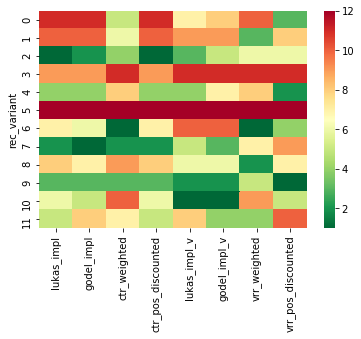

In [121]:
#rank-based heatmap
import seaborn as sns
sns.heatmap((1-resultsGroupByRV_mean).rank(axis=0), cmap="RdYlGn_r")

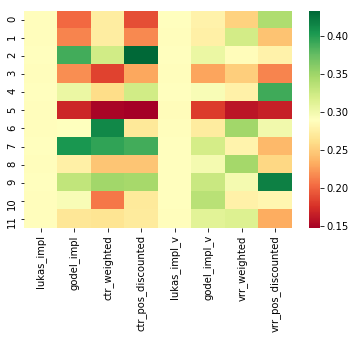

In [123]:
#normalized values based heatmap
norm_ro = np.abs(normalize(resultsGroupByRV_mean.iloc[:,:].T).T)
normalized_resOnline = pd.DataFrame(norm_ro, columns = resultsGroupByRV_mean.columns)
sns.heatmap(normalized_resOnline, cmap="RdYlGn")

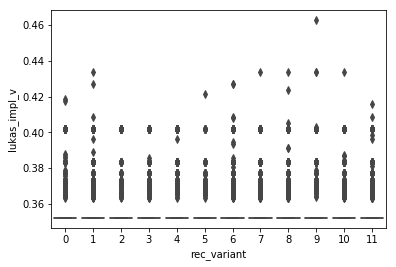

In [114]:
import seaborn as sns
sns.boxplot(x="rec_variant", y="lukas_impl_v", hue=None, data=recsCountRestr)

In [ ]:
import seaborn as sns
sns.violinplot(x="rec_variant", y="lukas_impl_v", hue=None, data=recsCountRestr)

In [ ]:
import seaborn as sns
sns.violinplot(x="rec_variant", y="vrr_pos_discounted", hue=None, data=recsCountRestr)

In [ ]:
resultsGroupByRV_q75 = resultsGroupByRV.agg(q75)
resultsGroupByRV_q75

In [ ]:
resultsGroupByRV_q90 = resultsGroupByRV.agg(q90)
resultsGroupByRV_q90

In [ ]:
resultsGroupByRV_q95 = resultsGroupByRV.agg(q95)
resultsGroupByRV_q95

# Second ChRF layer: offline to online metrics

In [199]:
algVariants = [{"name":"doc2vec", "params": "128,1", "aggregation": "last", "diversity": "no", "novelty": "yes"},
            {"name":"doc2vec", "params": "128,1", "aggregation": "temporal", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "no", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "128,5", "aggregation": "max", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "noSameObjects", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "mean", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "window10", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "64,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"word2vec", "params": "32,5", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"word2vec", "params": "128,3", "aggregation": "last", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "32,3", "aggregation": "window10", "diversity": "no", "novelty": "no"}
]

In [200]:
#get data from off-line evaluation
df = pd.read_csv("resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.reset_index(inplace=True)
dfMean.head()
selectedRes = map(lambda x: dfMean.loc[(dfMean.alg == x["name"]) & (dfMean.params == x["params"]) & (dfMean.recAlg == x["aggregation"]) & (dfMean.noveltyEnhance == x["novelty"])  & (dfMean.diversityEnhance == x["diversity"])  ], algVariants )
lst = list(selectedRes)
dct = dict([(i, lst[i].iloc[0,:].to_dict()) for i in range(len(lst))])
dfx = pd.DataFrame.from_dict(dct, orient='index')
dfx.index.name = 'recVariant'
dfx

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
recVariant,,,,,,,,,,,,,,,,,,,,,
0,doc2vec,"128,1",last,yes,no,-56.500787,-0.292326,0.019512,0.617363,0.030878,...,0.032393,0.019155,0.056917,0.170651,0.233618,0.233531,1.000000,1.000000,0.785023,0.799611
1,doc2vec,"128,1",temporal,no,yes,-76.254187,-0.361817,0.022211,0.678597,0.031335,...,0.022517,0.012119,0.075085,0.176429,0.219208,0.220975,0.997548,0.996848,0.866049,0.838122
2,doc2vec,"32,5",mean,no,no,-114.389802,-0.455116,0.016662,0.554607,0.028117,...,0.025303,0.016517,0.049527,0.164425,0.211227,0.211395,0.997198,0.997373,0.762579,0.785867
3,doc2vec,"32,5",mean,no,yes,-114.389802,-0.455116,0.015012,0.554607,0.025444,...,0.020021,0.012094,0.046461,0.161362,0.213367,0.214064,0.996848,0.997723,0.905701,0.859131
4,doc2vec,"128,5",max,yes,no,-35.840726,-0.213676,0.010498,0.525550,0.012323,...,0.006786,0.003944,0.031365,0.151906,0.233073,0.228605,0.995447,0.994571,0.682880,0.740691
5,attributeCosineSim,noSameObjects,temporal,yes,no,-102.214048,-0.405553,0.106978,0.797143,0.146160,...,0.175658,0.123013,0.215048,0.279155,0.259916,0.255013,0.993333,0.994386,0.228146,0.269825
6,attributeCosineSim,sameAllowed,mean,yes,no,-100.429215,-0.400451,0.106204,0.795240,0.149409,...,0.172193,0.119028,0.213611,0.277640,0.230867,0.228657,0.994386,0.993684,0.171294,0.222901
7,attributeCosineSim,sameAllowed,window10,no,no,-97.093916,-0.389754,0.095877,0.782645,0.127338,...,0.174247,0.114728,0.204664,0.271416,0.217160,0.217543,0.995088,0.996316,0.153174,0.208432
8,word2vec,"64,5",mean,no,yes,-91.185673,-0.413579,0.070162,0.809344,0.102732,...,0.126213,0.071382,0.182148,0.244129,0.216727,0.215008,0.972535,0.973415,0.705908,0.683315


In [201]:
results = pd.concat([dfx, resultsGroupByRV_mean], axis=1)
results

,alg,params,recAlg,noveltyEnhance,diversityEnhance,R^2,-mae,map,auc,mrr,...,ild5,ild10,lukas_impl,godel_impl,ctr_weighted,ctr_pos_discounted,lukas_impl_v,godel_impl_v,vrr_weighted,vrr_pos_discounted
0,doc2vec,"128,1",last,yes,no,-56.500787,-0.292326,0.019512,0.617363,0.030878,...,0.785023,0.799611,0.553064,0.003853,0.007360,0.004151,0.355390,0.005201,0.005441,0.014247
1,doc2vec,"128,1",temporal,no,yes,-76.254187,-0.361817,0.022211,0.678597,0.031335,...,0.866049,0.838122,0.553391,0.004081,0.007359,0.004745,0.355260,0.005163,0.006912,0.010193
2,doc2vec,"32,5",mean,no,no,-114.389802,-0.455116,0.016662,0.554607,0.028117,...,0.762579,0.785867,0.555999,0.007414,0.008692,0.009479,0.356028,0.005702,0.006158,0.011618
3,doc2vec,"32,5",mean,no,yes,-114.389802,-0.455116,0.015012,0.554607,0.025444,...,0.905701,0.859131,0.553553,0.004170,0.004959,0.005038,0.354832,0.004278,0.005403,0.008956
4,doc2vec,"128,5",max,yes,no,-35.840726,-0.213676,0.010498,0.525550,0.012323,...,0.682880,0.740691,0.554672,0.005810,0.007009,0.007071,0.355801,0.005515,0.005951,0.016277
5,attributeCosineSim,noSameObjects,temporal,yes,no,-102.214048,-0.405553,0.106978,0.797143,0.146160,...,0.228146,0.269825,0.552547,0.003237,0.004028,0.003213,0.353657,0.003384,0.003420,0.006933
6,attributeCosineSim,sameAllowed,mean,yes,no,-100.429215,-0.400451,0.106204,0.795240,0.149409,...,0.171294,0.222901,0.554030,0.005537,0.011123,0.005904,0.355099,0.005098,0.007482,0.012541
7,attributeCosineSim,sameAllowed,window10,no,no,-97.093916,-0.389754,0.095877,0.782645,0.127338,...,0.153174,0.208432,0.555467,0.007719,0.010635,0.008513,0.355507,0.006003,0.005997,0.009996
8,word2vec,"64,5",mean,no,yes,-91.185673,-0.413579,0.070162,0.809344,0.102732,...,0.705908,0.683315,0.553745,0.005265,0.006624,0.005388,0.355504,0.005581,0.007455,0.010721
9,word2vec,"32,5",temporal,yes,no,-104.675858,-0.438210,0.079717,0.816465,0.102166,...,0.433679,0.494720,0.554954,0.006325,0.009371,0.007582,0.356121,0.006120,0.006400,0.017429


In [202]:
def product_impl(b,h):
    if b == 0:
        return 1
    if h < b:
        return h/b
    return 1

def godel_impl(b,h):
    if h < b:
        return h
    return 1

def lukas_impl(b,h):
    if h < b:
        return 1 - b + h
    return 1
def apply_impl(fun, lst):
    res = [fun(b,h) for (b,h) in lst]
    return np.mean(res)

In [203]:
from sklearn.preprocessing import normalize
dfx["-mae"] = 1 - dfx["-mae"].abs()
dfx.drop("R^2", axis=1, inplace=True)
dfx.columns = list(dfx.columns)[0:5]+["1-mae"]+list(dfx.columns)[6:]
norm_d = np.abs(normalize(dfx.iloc[:,5:].T).T)
normalized_dfx = pd.DataFrame(norm_d, columns = dfx.columns[5:])
normalized_dfx


,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
0,0.326718,0.079755,0.249202,0.092316,0.066517,0.085410,0.067208,0.071243,0.065756,0.103920,0.214535,0.298434,0.299694,0.290864,0.290946,0.374865,0.372605
1,0.294635,0.090790,0.273920,0.093682,0.044345,0.068633,0.030078,0.049522,0.041604,0.137091,0.221798,0.280026,0.283580,0.290151,0.290029,0.413557,0.390551
2,0.251561,0.068108,0.223871,0.084061,0.052659,0.054906,0.041149,0.055650,0.056701,0.090428,0.206708,0.269831,0.271286,0.290049,0.290182,0.364148,0.366201
3,0.251561,0.061363,0.223871,0.076069,0.036030,0.054906,0.026264,0.044032,0.041518,0.084829,0.202857,0.272565,0.274712,0.289947,0.290284,0.432492,0.400341
4,0.363029,0.042911,0.212141,0.036841,0.008315,0.012201,0.015934,0.014925,0.013538,0.057267,0.190969,0.297738,0.293372,0.289540,0.289367,0.326090,0.345150
5,0.274443,0.437281,0.321772,0.436971,0.391472,0.360572,0.403682,0.386333,0.422290,0.392637,0.350941,0.332029,0.327261,0.288925,0.289313,0.108945,0.125734
6,0.276799,0.434118,0.321004,0.446685,0.416459,0.375851,0.405097,0.378711,0.408609,0.390014,0.349037,0.294919,0.293438,0.289231,0.289109,0.081797,0.103868
7,0.281738,0.391906,0.315919,0.380700,0.385919,0.394185,0.391948,0.383229,0.393847,0.373678,0.341211,0.277410,0.279175,0.289436,0.289874,0.073144,0.097126
8,0.270738,0.286795,0.326697,0.307135,0.250755,0.311245,0.186728,0.277585,0.245045,0.332568,0.306907,0.276856,0.275922,0.282876,0.283211,0.337086,0.318413
9,0.259366,0.325851,0.329571,0.305444,0.342699,0.358776,0.362316,0.384445,0.342832,0.356375,0.323915,0.312838,0.313165,0.284719,0.284236,0.207091,0.230531


In [204]:
norm_ro = np.abs(normalize(resultsGroupByRV_mean.iloc[:,:].T).T)
normalized_resOnline = pd.DataFrame(norm_ro, columns = resultsGroupByRV_mean.columns)
normalized_resOnline.columns=[
    r'${I}_{L}^c$',r'${I}_{G}^c$',r'${I}_{G,nov}^c$',r'${I}_{G,pos}^c$',
    r'${I}_{L}^v$',r'${I}_{G}^v$',r'${I}_{G,nov}^v$',r'${I}_{G,pos}^v$']
normalized_resOnline

,${I}_{L}^c$,${I}_{G}^c$,"${I}_{G,nov}^c$","${I}_{G,pos}^c$",${I}_{L}^v$,${I}_{G}^v$,"${I}_{G,nov}^v$","${I}_{G,pos}^v$"
0,0.288121,0.201937,0.273286,0.189553,0.288674,0.277706,0.253349,0.341291
1,0.288292,0.213890,0.273236,0.216662,0.288568,0.275671,0.321852,0.244190
2,0.289650,0.388605,0.322741,0.432865,0.289192,0.304423,0.286735,0.278318
3,0.288376,0.218561,0.184133,0.230062,0.288221,0.228388,0.251578,0.214546
4,0.288959,0.304512,0.260236,0.322868,0.289007,0.294457,0.277079,0.389916
5,0.287852,0.169669,0.149544,0.146709,0.287266,0.180694,0.159233,0.166074
6,0.288624,0.290232,0.413008,0.269604,0.288437,0.272173,0.348387,0.300417
7,0.289373,0.404555,0.394872,0.388747,0.288769,0.320530,0.279264,0.239460
8,0.288476,0.275971,0.245971,0.246033,0.288767,0.297992,0.347140,0.256818
9,0.289106,0.331488,0.347947,0.346219,0.289268,0.326739,0.297995,0.417510


In [205]:
res_godel = {}

for i in dfx.columns[5:]:
    res_godel[i] = {}
    for j in resultsGroupByRV_mean.columns:
        lst = list(zip(dfx[i].values, resultsGroupByRV_mean[j].values))
        res_godel[i][j] = apply_impl(godel_impl, lst)
pd.DataFrame(res_godel)
#zakladni problem je numericka nestability body a head (to ze prumerne AUC je vetsi nez prumerne R5 ji znevyhodnuje)


,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
ctr_pos_discounted,0.006079,0.006079,0.006079,0.006079,0.254280,0.171367,0.088823,0.088823,0.088823,0.006079,0.006079,0.006079,0.006079,0.006079,0.006079,0.006079,0.006079
ctr_weighted,0.007496,0.007496,0.007496,0.007496,0.338494,0.172854,0.090245,0.090245,0.090245,0.007496,0.007496,0.007496,0.007496,0.007496,0.007496,0.007496,0.007496
godel_impl,0.005347,0.005347,0.005347,0.005347,0.170912,0.170912,0.088196,0.005347,0.088196,0.005347,0.005347,0.005347,0.005347,0.005347,0.005347,0.005347,0.005347
godel_impl_v,0.005349,0.005349,0.005349,0.005349,0.088222,0.088222,0.088222,0.005349,0.088222,0.005349,0.005349,0.005349,0.005349,0.005349,0.005349,0.005349,0.005349
lukas_impl,0.628330,1.000000,0.628237,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.554126,0.554126,0.777035,0.777035
lukas_impl_v,0.355391,1.000000,0.355391,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.355391,0.355391,0.516702,0.516702
vrr_pos_discounted,0.011694,0.093671,0.011694,0.093671,0.423253,0.423253,0.341107,0.093671,0.093671,0.011694,0.011694,0.011694,0.011694,0.011694,0.011694,0.011694,0.011694
vrr_weighted,0.006111,0.006111,0.006111,0.006111,0.254589,0.088948,0.088948,0.006111,0.088948,0.006111,0.006111,0.006111,0.006111,0.006111,0.006111,0.006111,0.006111


In [206]:
res_product = {}

for i in dfx.columns[5:]:
    res_product[i] = {}
    for j in resultsGroupByRV_mean.columns:
        lst = list(zip(dfx[i].values, resultsGroupByRV_mean[j].values))
        res_product[i][j] = apply_impl(product_impl, lst)
pd.DataFrame(res_product)
#zakladni problem je numericka nestability body a head (to ze prumerne AUC je vetsi nez prumerne R5 ji znevyhodnuje)


,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
ctr_pos_discounted,0.009970,0.207708,0.008916,0.146249,0.438954,0.401909,0.331714,0.185069,0.250647,0.072939,0.028938,0.027243,0.027332,0.006127,0.006129,0.016395,0.013774
ctr_weighted,0.012264,0.236942,0.010789,0.166582,0.504921,0.479230,0.379303,0.205986,0.287257,0.083751,0.034983,0.033420,0.033530,0.007555,0.007557,0.021580,0.017956
godel_impl,0.008751,0.175351,0.007775,0.123597,0.412700,0.374020,0.292925,0.157728,0.225602,0.061892,0.025159,0.023941,0.024022,0.005390,0.005391,0.014750,0.012357
godel_impl_v,0.008697,0.174673,0.007749,0.123220,0.431487,0.389515,0.298738,0.156197,0.230797,0.061432,0.025217,0.023918,0.023995,0.005391,0.005393,0.013965,0.011839
lukas_impl,0.900500,1.000000,0.800654,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.558385,0.558543,0.856708,0.855250
lukas_impl_v,0.579437,1.000000,0.516599,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.358123,0.358224,0.689015,0.660314
vrr_pos_discounted,0.018867,0.366799,0.017156,0.269135,0.561749,0.573298,0.477305,0.273217,0.400005,0.144384,0.056231,0.051882,0.052089,0.011788,0.011793,0.029487,0.025152
vrr_weighted,0.009980,0.199018,0.008832,0.139868,0.461335,0.441291,0.342168,0.177523,0.258302,0.069748,0.028816,0.027351,0.027440,0.006161,0.006163,0.015949,0.013540


## variant with unit vector normalization

In [207]:
res_godel = {}

for i in normalized_dfx.columns:
    res_godel[i] = {}
    for j in normalized_resOnline.columns:
        lst = list(zip(normalized_dfx[i].values, normalized_resOnline[j].values))
        res_godel[i][j] = apply_impl(godel_impl, lst)
pd.DataFrame(res_godel)
#zakladni problem je numericka nestability body a head


,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
"${I}_{G,nov}^c$",0.549609,0.690292,0.610655,0.690292,0.690292,0.684870,0.747706,0.684870,0.802043,0.684870,0.671219,0.488449,0.488449,0.488449,0.488449,0.564042,0.564042
"${I}_{G,nov}^v$",0.687164,0.639736,0.694037,0.639736,0.639736,0.639736,0.639736,0.639736,0.639736,0.639736,0.639736,0.686603,0.686603,0.565357,0.565357,0.699216,0.699216
"${I}_{G,pos}^c$",0.490969,0.632752,0.550875,0.683690,0.683690,0.578271,0.641101,0.629208,0.695583,0.629208,0.550875,0.486713,0.486713,0.486713,0.486713,0.683765,0.683765
"${I}_{G,pos}^v$",0.552857,0.622998,0.494559,0.622998,0.684929,0.622998,0.684929,0.622998,0.684929,0.622998,0.622998,0.612736,0.612736,0.492717,0.492717,0.694597,0.694597
${I}_{G}^c$,0.616984,0.750360,0.494496,0.750360,0.696256,0.635921,0.696256,0.635921,0.696256,0.635921,0.559616,0.553226,0.613561,0.612373,0.612373,0.684573,0.684573
${I}_{G}^v$,0.627424,0.757077,0.699093,0.698576,0.645685,0.587184,0.645685,0.700972,0.700972,0.642471,0.698576,0.627424,0.686219,0.686219,0.686219,0.639887,0.639887
${I}_{L}^c$,0.762833,0.644352,0.585058,0.585058,0.644352,0.585058,0.644352,0.644352,0.644352,0.585058,0.585058,0.703555,0.703555,0.466490,0.466490,0.644323,0.644323
${I}_{L}^v$,0.762960,0.644306,0.585036,0.585036,0.644306,0.585036,0.644306,0.644306,0.644306,0.585036,0.585036,0.703554,0.703554,0.466450,0.466450,0.644369,0.644369


In [208]:
res_product = {}

for i in normalized_dfx.columns:
    res_product[i] = {}
    for j in normalized_resOnline.columns:
        lst = list(zip(normalized_dfx[i].values, normalized_resOnline[j].values))
        res_product[i][j] = apply_impl(product_impl, lst)
pd.DataFrame(res_product)

,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
"${I}_{G,nov}^c$",0.858600,0.876040,0.879329,0.870793,0.876258,0.863061,0.872622,0.866061,0.882126,0.867991,0.879519,0.877041,0.876573,0.870513,0.870539,0.847906,0.845002
"${I}_{G,nov}^v$",0.912924,0.875536,0.931316,0.882621,0.857104,0.865971,0.851215,0.863767,0.863116,0.878397,0.913871,0.927889,0.928644,0.929447,0.929358,0.889409,0.893185
"${I}_{G,pos}^c$",0.863389,0.865837,0.861569,0.862258,0.861012,0.852959,0.857050,0.857842,0.868948,0.859072,0.873854,0.874111,0.873029,0.864670,0.864712,0.856792,0.862190
"${I}_{G,pos}^v$",0.902321,0.841871,0.875045,0.838634,0.835694,0.833879,0.834023,0.844815,0.843025,0.839998,0.869293,0.899795,0.898582,0.885440,0.885323,0.876929,0.886973
${I}_{G}^c$,0.880864,0.889650,0.888037,0.883808,0.873494,0.873954,0.867955,0.878980,0.881853,0.878570,0.902145,0.892985,0.892493,0.890126,0.889934,0.859481,0.865377
${I}_{G}^v$,0.928859,0.885038,0.938393,0.884293,0.874188,0.879452,0.867203,0.878370,0.878941,0.881225,0.922677,0.934082,0.934149,0.938247,0.938146,0.879874,0.886829
${I}_{L}^c$,0.961385,0.886376,0.943487,0.888589,0.869783,0.874376,0.862958,0.876915,0.874445,0.879962,0.922363,0.975475,0.977724,0.996862,0.996783,0.889152,0.897158
${I}_{L}^v$,0.961779,0.886328,0.943428,0.888622,0.869669,0.874343,0.862846,0.876820,0.874372,0.879952,0.922331,0.975486,0.977732,0.996725,0.996647,0.889280,0.897291


In [209]:
res_lukas = {}

for i in normalized_dfx.columns:
    res_lukas[i] = {}
    for j in normalized_resOnline.columns:
        lst = list(zip(normalized_dfx[i].values, normalized_resOnline[j].values))
        res_lukas[i][j] = apply_impl(lukas_impl, lst)
pd.DataFrame(res_lukas)

,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
"${I}_{G,nov}^c$",0.957193,0.951883,0.963042,0.950068,0.950705,0.948575,0.948040,0.948270,0.952047,0.951076,0.960558,0.963295,0.963369,0.962569,0.962566,0.941608,0.943860
"${I}_{G,nov}^v$",0.972681,0.948747,0.978007,0.951262,0.943661,0.948542,0.940316,0.946106,0.944299,0.953348,0.970376,0.977136,0.977586,0.979572,0.979529,0.956620,0.959645
"${I}_{G,pos}^c$",0.958819,0.945018,0.957734,0.943467,0.944104,0.944473,0.941681,0.944383,0.945382,0.946247,0.958338,0.961794,0.961628,0.960860,0.960853,0.943424,0.948177
"${I}_{G,pos}^v$",0.972598,0.935263,0.960536,0.934382,0.934080,0.935764,0.932369,0.938273,0.934729,0.938594,0.955055,0.970038,0.969825,0.966915,0.966857,0.951085,0.957254
${I}_{G}^c$,0.963796,0.953126,0.966033,0.951029,0.949008,0.951638,0.946166,0.951095,0.950307,0.952959,0.967079,0.967532,0.967481,0.968177,0.968102,0.944232,0.948984
${I}_{G}^v$,0.978492,0.951084,0.980114,0.950853,0.949610,0.953386,0.946265,0.951035,0.949186,0.953899,0.972963,0.979448,0.979662,0.982126,0.982079,0.952533,0.957115
${I}_{L}^c$,0.986812,0.953363,0.981720,0.954323,0.948277,0.951260,0.944932,0.950722,0.948915,0.954290,0.973456,0.992225,0.992978,0.999089,0.999067,0.956970,0.961551
${I}_{L}^v$,0.986939,0.953317,0.981698,0.954301,0.948231,0.951238,0.944886,0.950676,0.948869,0.954268,0.973434,0.992224,0.992977,0.999050,0.999028,0.957016,0.961597


In [210]:
pd.DataFrame(res_product)

,1-mae,map,auc,mrr,p5,p10,r5,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
"${I}_{G,nov}^c$",0.858600,0.876040,0.879329,0.870793,0.876258,0.863061,0.872622,0.866061,0.882126,0.867991,0.879519,0.877041,0.876573,0.870513,0.870539,0.847906,0.845002
"${I}_{G,nov}^v$",0.912924,0.875536,0.931316,0.882621,0.857104,0.865971,0.851215,0.863767,0.863116,0.878397,0.913871,0.927889,0.928644,0.929447,0.929358,0.889409,0.893185
"${I}_{G,pos}^c$",0.863389,0.865837,0.861569,0.862258,0.861012,0.852959,0.857050,0.857842,0.868948,0.859072,0.873854,0.874111,0.873029,0.864670,0.864712,0.856792,0.862190
"${I}_{G,pos}^v$",0.902321,0.841871,0.875045,0.838634,0.835694,0.833879,0.834023,0.844815,0.843025,0.839998,0.869293,0.899795,0.898582,0.885440,0.885323,0.876929,0.886973
${I}_{G}^c$,0.880864,0.889650,0.888037,0.883808,0.873494,0.873954,0.867955,0.878980,0.881853,0.878570,0.902145,0.892985,0.892493,0.890126,0.889934,0.859481,0.865377
${I}_{G}^v$,0.928859,0.885038,0.938393,0.884293,0.874188,0.879452,0.867203,0.878370,0.878941,0.881225,0.922677,0.934082,0.934149,0.938247,0.938146,0.879874,0.886829
${I}_{L}^c$,0.961385,0.886376,0.943487,0.888589,0.869783,0.874376,0.862958,0.876915,0.874445,0.879962,0.922363,0.975475,0.977724,0.996862,0.996783,0.889152,0.897158
${I}_{L}^v$,0.961779,0.886328,0.943428,0.888622,0.869669,0.874343,0.862846,0.876820,0.874372,0.879952,0.922331,0.975486,0.977732,0.996725,0.996647,0.889280,0.897291


In [220]:
df_product = pd.DataFrame(res_product)
df_product = 1-df_product
dfp = df_product.rank(axis=1).reindex([
    r'${I}_{G}^c$',r'${I}_{G,pos}^c$',r'${I}_{G,nov}^c$',r'${I}_{L}^c$',
    r'${I}_{G}^v$',r'${I}_{G,pos}^v$',r'${I}_{G,nov}^v$',r'${I}_{L}^v$'])
#1 = best rank

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

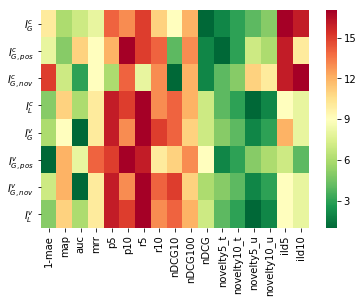

In [221]:
import seaborn as sns
sns.heatmap(dfp, cmap="RdYlGn_r")
plt.yticks(rotation=0) 

In [229]:
dfp_mean = df_product.rank(axis=1).mean(axis=0)
dfp_mean

1-mae           7.125
map             9.125
auc             5.375
mrr            10.000
p5             13.875
p10            14.625
r5             15.250
r10            12.875
nDCG10         10.250
nDCG100        12.000
nDCG            5.125
novelty5_t      3.375
novelty10_t     3.500
novelty5_u      4.125
novelty10_u     4.625
ild5           11.875
ild10           9.875
dtype: float64

In [223]:
df_godel = pd.DataFrame(res_godel)
df_godel = 1-df_godel
dfg = df_godel.rank(axis=1).reindex([
    r'${I}_{G}^c$',r'${I}_{G,pos}^c$',r'${I}_{G,nov}^c$',r'${I}_{L}^c$',
    r'${I}_{G}^v$',r'${I}_{G,pos}^v$',r'${I}_{G,nov}^v$',r'${I}_{L}^v$'])
#1 = best rank

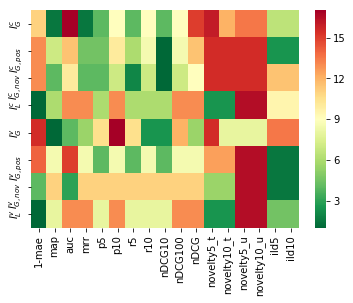

In [224]:
sns.heatmap(dfg, cmap="RdYlGn_r")

In [230]:
dfg_mean = df_godel.rank(axis=1).mean(axis=0)
dfg_mean

1-mae           9.0625
map             5.8750
auc            10.8125
mrr             7.6250
p5              6.5000
p10            11.0625
r5              6.4375
r10             7.5625
nDCG10          4.6875
nDCG100        10.2500
nDCG           10.8125
novelty5_t     10.6875
novelty10_t     9.2500
novelty5_u     14.8125
novelty10_u    14.8125
ild5            6.3750
ild10           6.3750
dtype: float64

In [226]:
df_lukas = pd.DataFrame(res_lukas)
df_lukas = 1-df_lukas
dfl = df_lukas.rank(axis=1).reindex([
    r'${I}_{G}^c$',r'${I}_{G,pos}^c$',r'${I}_{G,nov}^c$',r'${I}_{L}^c$',
    r'${I}_{G}^v$',r'${I}_{G,pos}^v$',r'${I}_{G,nov}^v$',r'${I}_{L}^v$'])
#1 = best rank

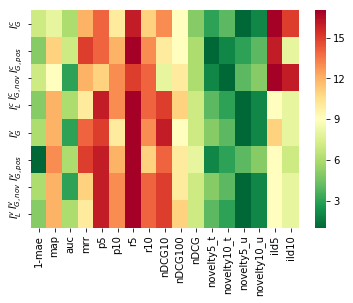

In [227]:
sns.heatmap(dfl, cmap="RdYlGn_r")

In [231]:
dfl_mean = df_lukas.rank(axis=1).mean(axis=0)
dfl_mean

1-mae           5.250
map            11.125
auc             5.000
mrr            12.375
p5             14.750
p10            12.000
r5             16.625
r10            13.000
nDCG10         13.250
nDCG100         9.875
nDCG            6.625
novelty5_t      3.250
novelty10_t     3.000
novelty5_u      2.000
novelty10_u     3.000
ild5           12.125
ild10           9.750
dtype: float64

In [232]:
df_mean = pd.DataFrame({"product":dfp_mean, "lukas":dfl_mean, "goedel":dfg_mean})
df_mean

,product,lukas,goedel
1-mae,7.125,5.250,9.0625
map,9.125,11.125,5.8750
auc,5.375,5.000,10.8125
mrr,10.000,12.375,7.6250
p5,13.875,14.750,6.5000
p10,14.625,12.000,11.0625
r5,15.250,16.625,6.4375
r10,12.875,13.000,7.5625
nDCG10,10.250,13.250,4.6875
nDCG100,12.000,9.875,10.2500


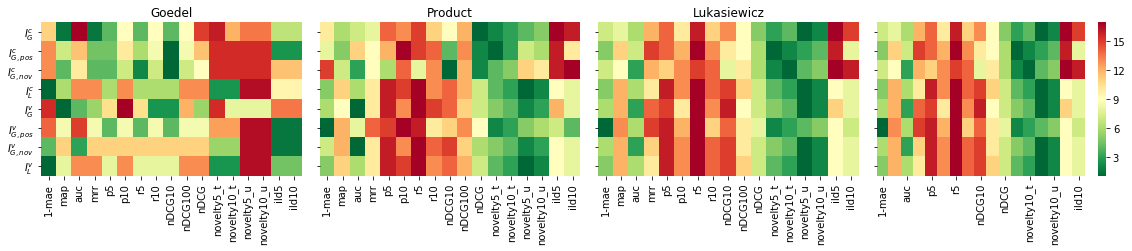

In [219]:
import seaborn as sns
fig, axis = plt.subplots(1,4, figsize=(16,3.6), sharey=True)

sns.heatmap(dfg, cmap="RdYlGn_r", ax=axis[0], cbar=False)
sns.heatmap(dfp, cmap="RdYlGn_r", ax=axis[1], cbar=False)
p=sns.heatmap(dfl, cmap="RdYlGn_r", ax=axis[2], cbar=False)
sns.heatmap(dfl, cmap="RdYlGn_r", ax=axis[3])
axis[0].set_title("Goedel")
axis[1].set_title("Product")
axis[2].set_title("Lukasiewicz")
plt.setp( axis[0].yaxis.get_majorticklabels(), rotation=0 )
plt.tight_layout()
plt.savefig("heatmapResults.png", dpi=300)

In [233]:
#example evaluation
true = [0.25, 0.5, 0.9]
predicted1 = [0.25, 0.25, 0.25]
predicted2 = [0.5, 0.5, 0.5]
predicted3 = [0.9, 0.9, 0.9]

In [236]:
print(apply_impl(godel_impl, list(zip(predicted1,true))))
print(apply_impl(product_impl, list(zip(predicted1,true))))
print(apply_impl(lukas_impl, list(zip(predicted1,true))))

1.0
1.0
1.0


In [237]:
print(apply_impl(godel_impl, list(zip(predicted2,true))))
print(apply_impl(product_impl, list(zip(predicted2,true))))
print(apply_impl(lukas_impl, list(zip(predicted2,true))))

0.75
0.8333333333333334
0.9166666666666666


In [238]:
print(apply_impl(godel_impl, list(zip(predicted3,true))))
print(apply_impl(product_impl, list(zip(predicted3,true))))
print(apply_impl(lukas_impl, list(zip(predicted3,true))))

0.5833333333333334
0.6111111111111112
0.65


In [243]:
print(np.mean(pd.DataFrame(res_godel)).mean())
print(np.mean(pd.DataFrame(res_product)).mean())
print(np.mean(pd.DataFrame(res_lukas)).mean())

0.6288698339644306
0.8883220231860589
0.9588415405059462
